In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

In [3]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

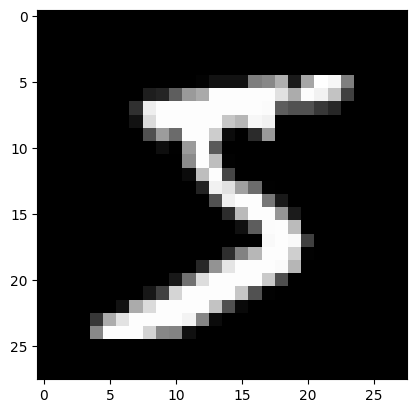

In [5]:
plt.imshow(X_train[0],cmap="gray")

In [ ]:
X_train =X_train/255
X_test= X_test/255

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
model=KNeighborsClassifier(n_neighbors=11,weights='distance')

In [45]:
model.fit(X_train.reshape(-1,28*28),Y_train)

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [46]:
y_prob=model.predict(X_test.reshape(-1,28*28))

In [47]:
y_prob

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_prob)

0.9678

In [ ]:
model=Sequential()

In [ ]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train,validation_split=0.2,epochs=100)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9939 - loss: 0.0179 - val_accuracy: 0.9780 - val_loss: 0.1049
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9958 - loss: 0.0126 - val_accuracy: 0.9749 - val_loss: 0.1239
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9959 - loss: 0.0115 - val_accuracy: 0.9748 - val_loss: 0.1385
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9949 - loss: 0.0172 - val_accuracy: 0.9758 - val_loss: 0.1373
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9967 - loss: 0.0104 - val_accuracy: 0.9737 - val_loss: 0.1421
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9947 - loss: 0.0144 - val_accuracy: 0.9787 - val_loss: 0.1245
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9967 - loss: 0.0107 - val_accuracy: 0.9753 - val_loss: 0.1518
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9956 - lo

In [ ]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_pred=y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
accuracy_score(Y_test,y_pred)


0.9784

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
